C:\Users\APF\AppData\Local\Temp\ipykernel_7784\78273162.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Qty.'] = pd.to_numeric(filtered_data['Qty.'], errors='coerce').fillna(0)


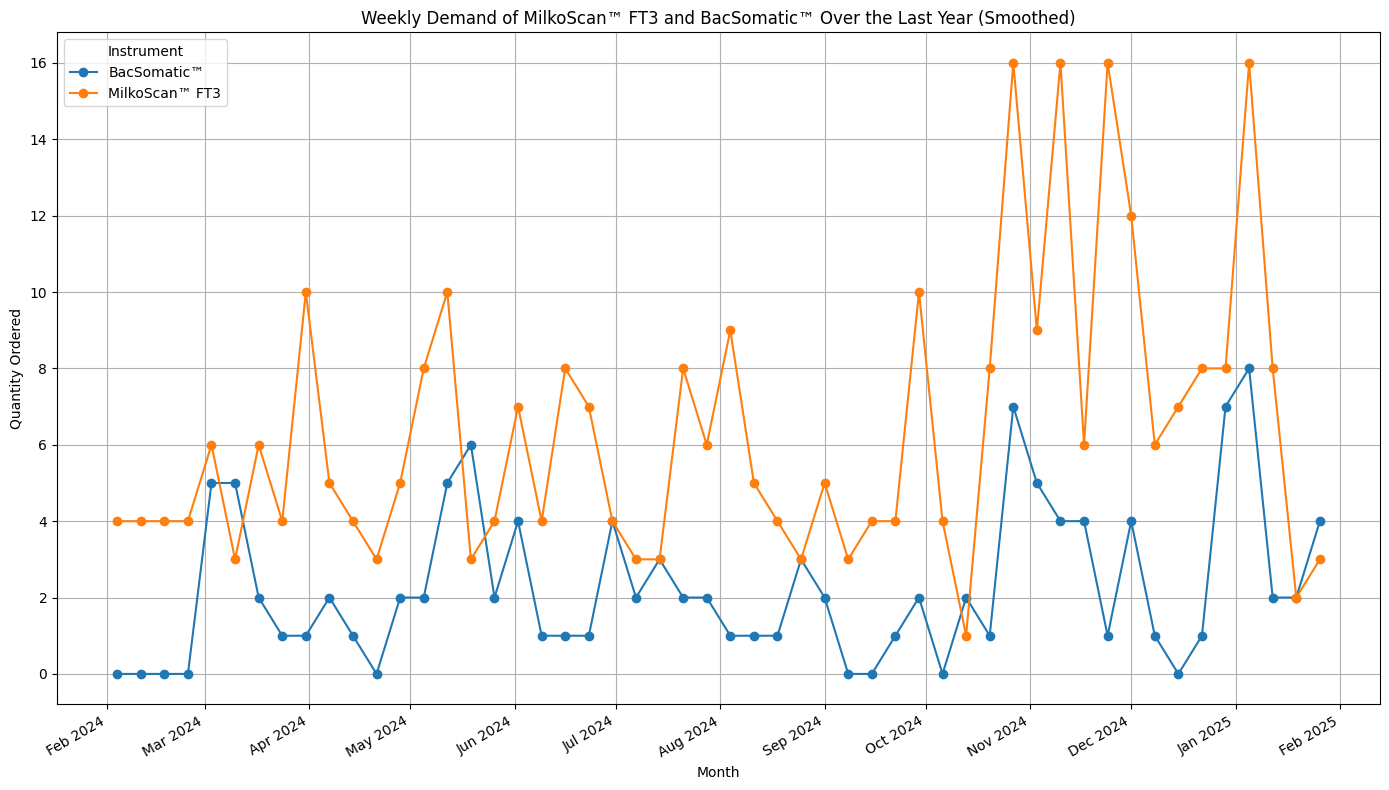

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'demand_data.csv'
data = pd.read_csv(file_path, encoding='Windows-1252')

# Ensure the OrderDate column is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%d-%m-%y')

# Filter data for the specific instruments, including variations
filtered_data = data[data['Instrument'].str.contains('MilkoScan™ FT3|BacSomatic™', na=False, case=False)]

# Convert the 'Qty.' column to numeric, forcing non-numeric entries to NaN and replacing with 0
filtered_data['Qty.'] = pd.to_numeric(filtered_data['Qty.'], errors='coerce').fillna(0)

# Group by Instrument and OrderDate, summing the quantities
grouped_data = filtered_data.groupby(['Instrument', 'OrderDate']).agg({'Qty.': 'sum'}).reset_index()

# Pivot data for analysis and plotting
pivot_data = grouped_data.pivot(index='OrderDate', columns='Instrument', values='Qty.').fillna(0)

# Handle variations:
# Combine "MilkoScan™ FT3" and "MilkoScan™ FT3?"
if 'MilkoScan™ FT3?' in pivot_data.columns:
    pivot_data['MilkoScan™ FT3'] += pivot_data['MilkoScan™ FT3?']
    pivot_data = pivot_data.drop(columns=['MilkoScan™ FT3?'], errors='ignore')

# Integrate refurbished data into respective instruments
refurbished_instruments = [col for col in pivot_data.columns if 'Refurbished' in col]
valid_refurbished = [col for col in refurbished_instruments if col in pivot_data.columns]

for refurbished in valid_refurbished:
    instrument_base = refurbished.replace(" Refurbished", "")
    if instrument_base in pivot_data.columns:
        pivot_data[instrument_base] += pivot_data[refurbished]
    pivot_data = pivot_data.drop(columns=[refurbished], errors='ignore')

# Resample the data by week to smooth trends
weekly_data = pivot_data.resample('W').sum()

# Plot the smoothed data with weekly aggregation and enforce all months on the x-axis
plt.figure(figsize=(14, 8))
colors = ['#1f77b4', '#ff7f0e']  # Specific colors for instruments

for color, instrument in zip(colors, weekly_data.columns):
    plt.plot(
        weekly_data.index,
        weekly_data[instrument],
        label=instrument,
        color=color,
        marker='o'
    )

# Enforce monthly labels on the x-axis
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

# Add titles and labels
plt.title("Weekly Demand of MilkoScan™ FT3 and BacSomatic™ Over the Last Year (Smoothed)")
plt.xlabel("Month")
plt.ylabel("Quantity Ordered")
plt.legend(title="Instrument")
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\APF\AppData\Local\Temp\ipykernel_7784\3877538971.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Qty.'] = pd.to_numeric(filtered_data['Qty.'], errors='coerce').fillna(0)
C:\Users\APF\AppData\Local\Temp\ipykernel_7784\3877538971.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the


=== TOTAL ORDERS (entire dataset) ===
Instrument
BacSomatic™                      118.000000
MilkoScan™ FT3                   330.000000
Ratio_MilkoScan_to_BacSomatic    158.028571
dtype: float64

=== AVERAGE WEEKLY DEMAND ===
Instrument
BacSomatic™                      2.269231
MilkoScan™ FT3                   6.346154
Ratio_MilkoScan_to_BacSomatic    3.675083
dtype: float64

=== CORRELATION MATRIX ===
Instrument      MilkoScan™ FT3  BacSomatic™
Instrument                                 
MilkoScan™ FT3        1.000000     0.403064
BacSomatic™           0.403064     1.000000

=== HEAD OF RATIO TIME SERIES ===
OrderDate
2024-02-04    NaN
2024-02-11    NaN
2024-02-18    NaN
2024-02-25    NaN
2024-03-03    1.2
Freq: W-SUN, Name: Ratio_MilkoScan_to_BacSomatic, dtype: float64


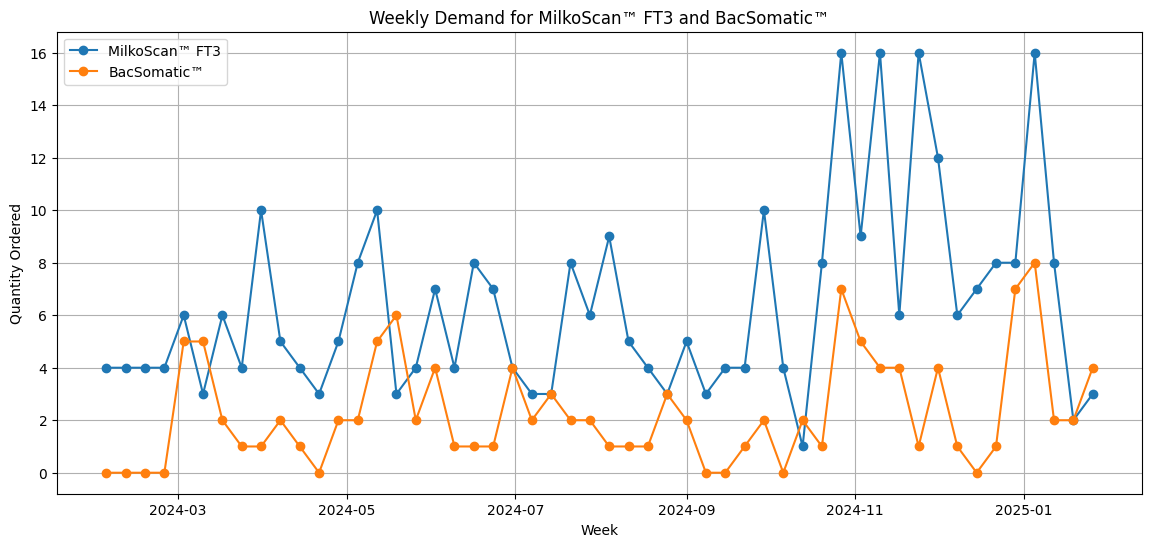

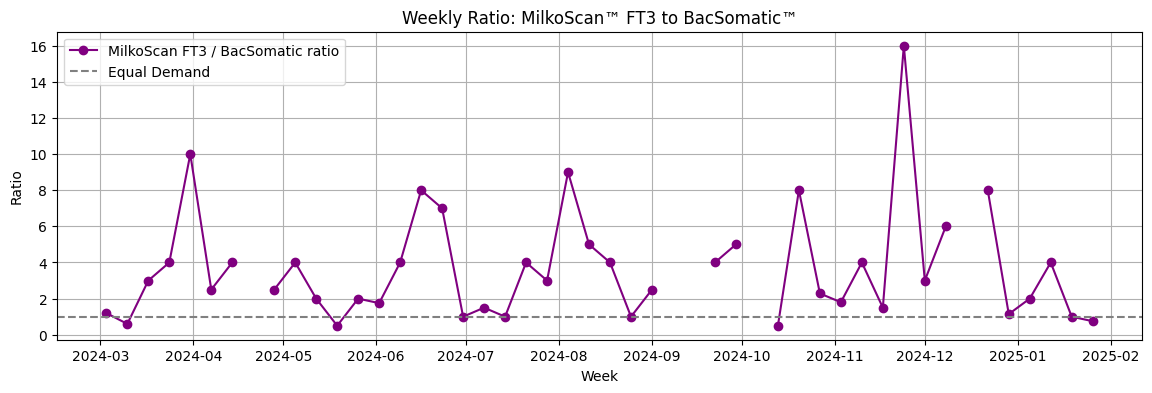

<Figure size 600x500 with 0 Axes>

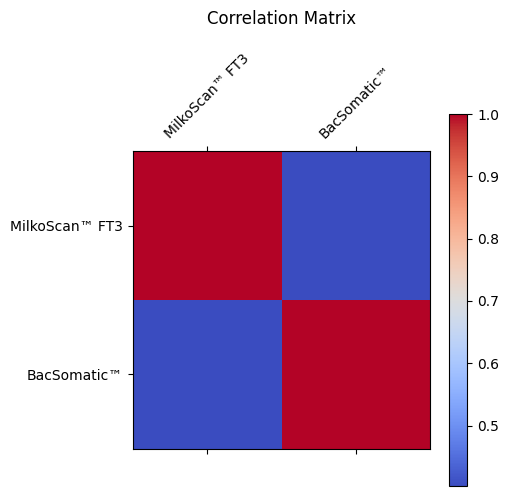

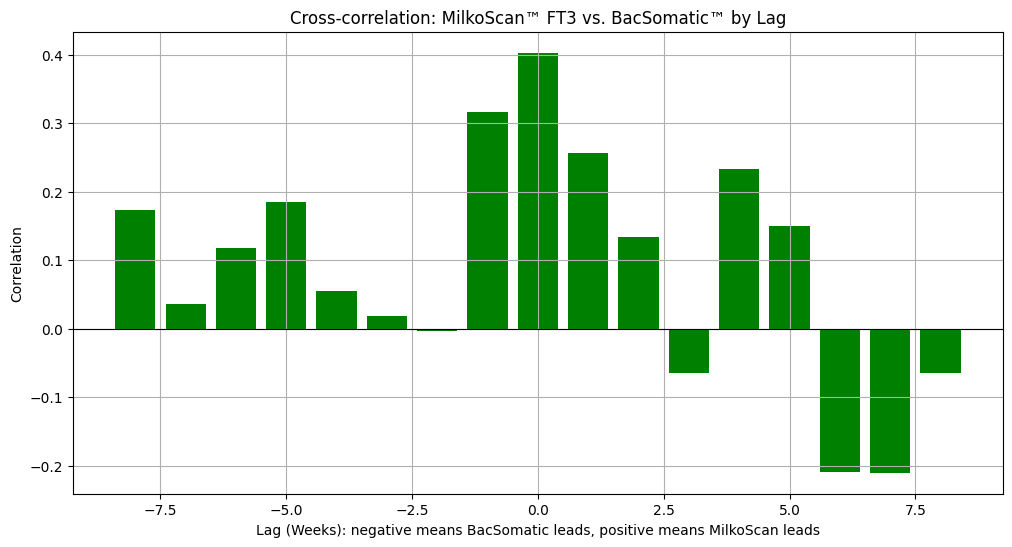

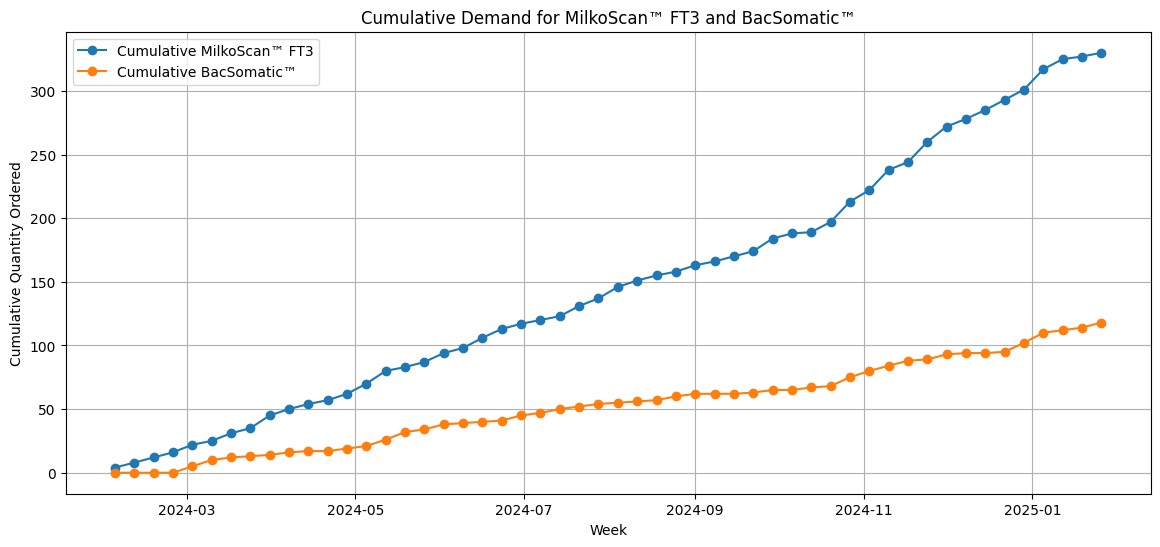

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'demand_data.csv'
data = pd.read_csv(file_path, encoding='Windows-1252')

# Ensure the OrderDate column is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%d-%m-%y')

# Filter data for specific instruments, including variations
filtered_data = data[data['Instrument'].str.contains('MilkoScan™ FT3|BacSomatic™', na=False, case=False)]

# Convert the 'Qty.' column to numeric, forcing non-numeric entries to NaN and replacing with 0
filtered_data['Qty.'] = pd.to_numeric(filtered_data['Qty.'], errors='coerce').fillna(0)

# Group by Instrument and OrderDate, summing the quantities
grouped_data = filtered_data.groupby(['Instrument', 'OrderDate']).agg({'Qty.': 'sum'}).reset_index()

# Pivot data for analysis and plotting
pivot_data = grouped_data.pivot(index='OrderDate', columns='Instrument', values='Qty.').fillna(0)

# Combine MilkoScan™ FT3 variations
if 'MilkoScan™ FT3?' in pivot_data.columns:
    pivot_data['MilkoScan™ FT3'] += pivot_data['MilkoScan™ FT3?']
    pivot_data.drop(columns=['MilkoScan™ FT3?'], inplace=True, errors='ignore')

# Integrate refurbished data into respective instruments
for col in pivot_data.columns:
    if 'Refurbished' in col:
        base_col = col.replace(' Refurbished', '')
        if base_col in pivot_data.columns:
            pivot_data[base_col] += pivot_data[col]
        pivot_data.drop(columns=[col], inplace=True)

# Resample the data by week to smooth trends
weekly_data = pivot_data.resample('W').sum()

# Calculate ratio of MilkoScan FT3 to BacSomatic demand
weekly_data['Ratio_MilkoScan_to_BacSomatic'] = weekly_data['MilkoScan™ FT3'] / weekly_data['BacSomatic™']
weekly_data['Ratio_MilkoScan_to_BacSomatic'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Print relevant data
print("\n=== TOTAL ORDERS (entire dataset) ===")
print(weekly_data.sum())

print("\n=== AVERAGE WEEKLY DEMAND ===")
print(weekly_data.mean())

print("\n=== CORRELATION MATRIX ===")
print(weekly_data[['MilkoScan™ FT3', 'BacSomatic™']].corr())

print("\n=== HEAD OF RATIO TIME SERIES ===")
print(weekly_data['Ratio_MilkoScan_to_BacSomatic'].head())

# Visualization 1: Weekly demand trends
plt.figure(figsize=(14, 6))
for instrument in ['MilkoScan™ FT3', 'BacSomatic™']:
    plt.plot(weekly_data.index, weekly_data[instrument], label=instrument, marker='o')
plt.title("Weekly Demand for MilkoScan™ FT3 and BacSomatic™")
plt.xlabel("Week")
plt.ylabel("Quantity Ordered")
plt.legend()
plt.grid()
plt.show()

# Visualization 2: Ratio over time
plt.figure(figsize=(14, 4))
plt.plot(weekly_data.index, weekly_data['Ratio_MilkoScan_to_BacSomatic'], label='MilkoScan FT3 / BacSomatic ratio', color='purple', marker='o')
plt.axhline(1, linestyle='--', color='gray', label='Equal Demand')
plt.title("Weekly Ratio: MilkoScan™ FT3 to BacSomatic™")
plt.xlabel("Week")
plt.ylabel("Ratio")
plt.legend()
plt.grid()
plt.show()

# Visualization 3: Correlation heatmap
correlation = weekly_data[['MilkoScan™ FT3', 'BacSomatic™']].corr()
plt.figure(figsize=(6, 5))  # Define a new figure size explicitly
plt.matshow(correlation, cmap='coolwarm', fignum=None)
plt.colorbar()
plt.xticks(range(correlation.shape[1]), correlation.columns, rotation=45)
plt.yticks(range(correlation.shape[0]), correlation.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()


# Visualization 4: Cross-correlation (interaction analysis)
lags = np.arange(-8, 9)
cross_corr = [weekly_data['MilkoScan™ FT3'].corr(weekly_data['BacSomatic™'].shift(lag)) for lag in lags]
plt.figure(figsize=(12, 6))
plt.bar(lags, cross_corr, color='green')
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Cross-correlation: MilkoScan™ FT3 vs. BacSomatic™ by Lag")
plt.xlabel("Lag (Weeks): negative means BacSomatic leads, positive means MilkoScan leads")
plt.ylabel("Correlation")
plt.grid()
plt.show()

# Visualization 5: Cumulative demand over time
cumulative_data = weekly_data[['MilkoScan™ FT3', 'BacSomatic™']].cumsum()
plt.figure(figsize=(14, 6))
for instrument in cumulative_data.columns:
    plt.plot(cumulative_data.index, cumulative_data[instrument], label=f"Cumulative {instrument}", marker='o')
plt.title("Cumulative Demand for MilkoScan™ FT3 and BacSomatic™")
plt.xlabel("Week")
plt.ylabel("Cumulative Quantity Ordered")
plt.legend()
plt.grid()
plt.show()
